**PROGRAMMING ASSIGNMENT**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from keras_preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils

Using TensorFlow backend.


**Downloading Dataset**

In [15]:
!wget "https://s3-us-west-1.amazonaws.com/places-image-dataset/Image/Dataset.zip"
!unzip Dataset.zip

/bin/sh: wget: command not found
unzip:  cannot find or open Dataset.zip, Dataset.zip.zip or Dataset.zip.ZIP.


In [3]:
from glob import glob
CATEGORIES = glob("Dataset/Train/*")

for i in  range(len(CATEGORIES)):
    CATEGORIES[i] = CATEGORIES[i][17:]
    print(CATEGORIES[i])
    
DATADIR_train = "Dataset/Train/"
DATADIR_valid = "Dataset/Valid/"
DATADIR_test = "Dataset/Test/"


airport_inside
artstudio
auditorium
bakery
bar
bathroom
bedroom
bookstore
bowling
buffet
casino
children_room
church_inside
classroom
cloister
closet
clothingstore
computerroom
concert_hall
corridor
deli
dentaloffice
dining_room
elevator
fastfood_restaurant
florist
gameroom
garage
greenhouse
grocerystore
gym
hairsalon
hospitalroom
inside_bus
inside_subway
jewelleryshop
kindergarden
kitchen
laboratorywet
laundromat
library
livingroom
lobby
locker_room
mall
meeting_room
movietheater
museum
nursery
office
operating_room
pantry
poolinside
prisoncell
restaurant
restaurant_kitchen
shoeshop
stairscase
studiomusic
subway
toystore
trainstation
tv_studio
videostore
waitingroom
warehouse
winecellar


**Plotting data**

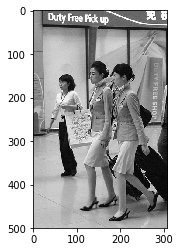

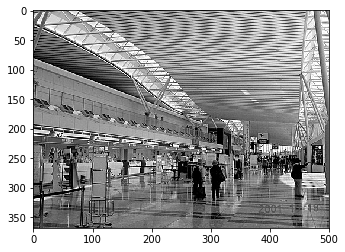

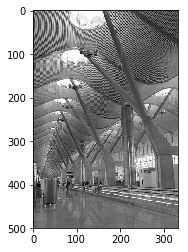

In [4]:
def plot_first(DATADIR_train):
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_train, categories)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap='gray')
            plt.show()
            break
        break

plot_first(DATADIR_train)
plot_first(DATADIR_valid)
plot_first(DATADIR_test)

**Processing and saving data into variables**

In [7]:
img_size = 100
training_data = []
validation_data = []
testing_data = []

def create_training_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_train, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
def create_validation_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_valid, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array, class_num])
            except Exception as e:
                pass
            
def create_testing_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_test, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()
create_validation_data()
create_testing_data()

In [8]:
print(len(training_data))
print(len(validation_data))
print(len(testing_data))

10970
2310
2310


In [9]:
import random
random.shuffle(training_data)
random.shuffle(validation_data)
random.shuffle(testing_data)

**Plotting processed data** 

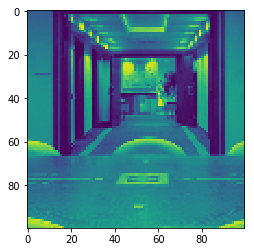

-------------- 19 -------------


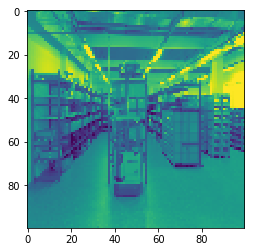

-------------- 65 -------------


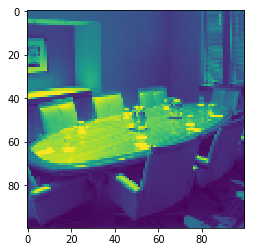

-------------- 45 -------------


In [10]:
def visualize(training_data):
    for sample in training_data[:1]:
        plt.imshow(sample[0])
        plt.show()
        print("--------------",sample[1],"-------------")  

visualize(training_data)
visualize(validation_data)
visualize(testing_data)

In [11]:
x_train = []
y_train = []
for features,label in training_data:
    x_train.append(features)
    y_train.append(label)
 
x_valid = []
y_valid = []
for features,label in validation_data:
    x_valid.append(features)
    y_valid.append(label)

x_test = []
y_test = []
for features,label in testing_data:
    x_test.append(features)
    y_test.append(label)
    

X_train = np.array(x_train).reshape(-1,img_size,img_size,1)
X_valid = np.array(x_valid).reshape(-1,img_size,img_size,1)
X_test = np.array(x_test).reshape(-1,img_size,img_size,1)

In [12]:
X_train = X_train.astype('float32')
X_train /= 255
print(X_train.shape)
print(X_train.shape[0], 'train_samples')

(10970, 100, 100, 1)
10970 train_samples


In [13]:
X_valid = X_valid.astype('float32')
X_valid /= 255
print(X_valid.shape)
print(X_valid.shape[0], 'valid_samples')

(2310, 100, 100, 1)
2310 valid_samples


In [14]:
X_test = X_test.astype('float32')
X_test /= 255
print(X_test.shape)
print(X_test.shape[0], 'test_samples')

(2310, 100, 100, 1)
2310 test_samples


In [15]:
Y_train = np_utils.to_categorical(y_train,67)
Y_valid = np_utils.to_categorical(y_valid,67)
Y_test = np_utils.to_categorical(y_test,67)

**Creating the model**

In [46]:
batch_size = 25
epochs = 20
channels = 1
conv = 3
maxpool = 2
filters = 32
classes = 67

model = Sequential() 
model.add(Convolution2D(filters,(conv,conv),border_mode='valid',input_shape=(img_size,img_size,1)))
convout1=Activation('relu')
model.add(convout1)
model.add(Convolution2D(filters,conv,conv))
convout2=Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size= (maxpool, maxpool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy', 'precision'])
model.summary()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(100, 100,..., padding="valid")`
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  del sys.path[0]


ValueError: Unknown metric function:precision

**Training the model**

In [17]:
import time

t0= time.time()
history = model.fit(X_train,Y_train,batch_size=batch_size,nb_epoch=epochs, 
          verbose=1,validation_data=(X_valid,Y_valid))

print(time.time()-t0)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 10970 samples, validate on 2310 samples
Epoch 1/20
10970/10970 [==============================] - 334s 30ms/step - loss: 4.0868 - acc: 0.0431 - val_loss: 3.8977 - val_acc: 0.0727
Epoch 2/20
10970/10970 [==============================] - 344s 31ms/step - loss: 3.9042 - acc: 0.0696 - val_loss: 3.7601 - val_acc: 0.0905
Epoch 3/20
10970/10970 [==============================] - 321s 29ms/step - loss: 3.7426 - acc: 0.0871 - val_loss: 3.6292 - val_acc: 0.1104
Epoch 4/20
10970/10970 [==============================] - 349s 32ms/step - loss: 3.5670 - acc: 0.1115 - val_loss: 3.5861 - val_acc: 0.1234
Epoch 5/20
10970/10970 [==============================] - 377s 34ms/step - loss: 3.3660 - acc: 0.1347 - val_loss: 3.5113 - val_acc: 0.1251
Epoch 6/20
10970/10970 [==============================] - 337s 31ms/step - loss: 3.1839 - acc: 0.1602 - val_loss: 3.4818 - val_acc: 0.1333
Epoch 7/20
10970/10970 [==============================] - 311s 28ms/step - loss: 2.9830 - acc: 0.1913 - val_loss: 3.4

In [18]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

**Evaluating the model**

In [19]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  4.29267544808
Test accuracy:  0.122510822524


In [20]:
print(model.predict_classes(X_test[1:6]))
print(Y_test[1:6])

[ 0  6 37  4 65]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0